**This project aims to compare two machine learning methods, Statsmodels and SKlearn, in a regression problem.**

**Statsmodels**

Importing Libraries and modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Loading the dataset.

In [2]:
data = pd.read_csv('car_price.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Becoming one with the data

In [3]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data.info()
# This table provides some information about the data, like the type of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


***Data Preprocessing***

*Missing Data*

In [5]:
# let's check Null data
data.isnull().sum()
# There are 172 missing data for Price and 150 for EngineeV.

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
#creating a copy of data
data_without_null = data.copy()

In [7]:
# now we need to remove these missing data
data_without_null = data_without_null.dropna(axis=0)

In [8]:
# check the information of the data
data_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [9]:
# check missing data
data_without_null.isnull().sum()
# good! we do not have any missing data.

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

Studying the outliers of each feature.

In [10]:
# the method below is to study the outliers by plotting the probability distribution functions.
import seaborn as sns # seeborn has a handy function to draw the probability.

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

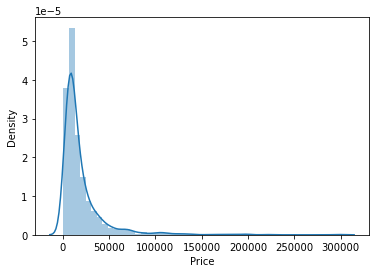

In [15]:
sns.distplot(data_without_null['Price'])
# for the car's price, the outliers are located on the right side of the plot related to the expensive cars.

In [21]:
#let's remove the one percent of the price from rght-side of the graph
q_price = data_without_null['Price'].quantile(0.99) # q_price is a variable equal to 99% of the price.
data_pre_process_1 = data_without_null[data_without_null['Price']<q_price] # I apply the above condition to the data
data_pre_process_1.describe() # the number of data decreases from 4025 to 3984

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

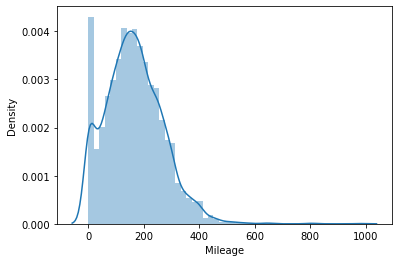

In [25]:
# plotting data for Mileage.
sns.distplot(data_pre_process_1['Mileage'])
#in this case, the data larger than 600 is almost outliers.

In [30]:
# the same method for Mileage.
q_mileage = data_pre_process_1['Mileage'].quantile(0.998) # q_price is a variable equal to 99.8% of the milage.
data_pre_process_2 = data_pre_process_1[data_pre_process_1['Mileage']<q_mileage] # I apply the above condition to the data
data_pre_process_2.describe() # we have just lost 8 data points in this case.

,Price,Mileage,EngineV,Year
count,3976.000000,3976.000000,3976.000000,3976.00000
mean,17827.760553,164.021378,2.743984,2006.29326
std,18969.098290,99.747787,4.960888,6.67514
min,600.000000,0.000000,0.600000,1969.00000
25%,6950.000000,93.000000,1.800000,2002.75000
50%,11400.000000,160.000000,2.200000,2007.00000
75%,21000.000000,230.000000,3.000000,2011.00000
max,129222.000000,550.000000,99.990000,2016.00000


In [ ]:
sns.distplot(data_pre_process_1['Mileage'])
